In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

In [2]:
def read_gridded_data(filename, report=True):
    """ function to read regular gridded data files and return a Python dictionary.
    inputs: filename -> name of file to be read
            report   -> boolean flag, if true then a table listing the file contents is printed to screen

    outputs: data    -> a python dictionary containing the file contents
    """
    # open the file and map the contents to a netCDF object. Use a test to capture
    # any issues with the data file
    try:
        nc = netCDF4.Dataset(filename,"r")
    except IOError:
        raise
    # if report is set to true then prind global attributes
    if report == True:
        print(f"Global Attributes For File: {filename}") # when witing strings, starting them with an 'f' allows you to insert other variables using {}.
        print("----------------------------------------------------------------------------------------------------")
        print(nc)
    # Define a dictionary to hold the contents
    data = {} 
    # loop over the file contents and write
    if report == True:
        # what variables are in this file?
        # printing Aligned Header 
        print("-------------------------------------------------------------------")        
        print(f"{'Variable Name' : <14} |{'Long Name':<32} |{'tdim, ydim, xdim':>17}") 
        print("-------------------------------------------------------------------")
    else:
        pass # we add a pass so we can close this if statement with an else

    for varname in nc.variables.keys():
        if report == True:
            print(f"{varname:<14} |{nc[varname].long_name:<32} |{', '.join([str(d) for d in nc[varname].shape]):>17}")
        else:
            pass
        # write the variable to the dictionary
        data[varname] = nc[varname][:] #  the [:] at the end indexes all the data
    
    # finally close the file
    nc.close()

    # return the filled data dictionary
    return data

In [3]:
era5_lsm_data = read_gridded_data("data/pa260x_ecmwf_Land_sea_mask_2.5_x_2.5_1950_2020.nc",report=False)

In [4]:
def plot_roi(xmin, xmax, ymin, ymax, lons, lats, lsm):
    ymkr = np.where((lats >= ymin)&(lats <= ymax))
    xmkr = np.where((lons >= xmin)&(lons <= xmax))
    
    # lets test with the land sea mask
    xdim = xmkr[0].size
    ydim = ymkr[0].size
    ratio = ydim/xdim
    xsize=12
    ysize = round(xsize*ratio,1)
    plt.figure(figsize=(xsize,ysize),dpi=200)
    plt.pcolormesh(lons[xmkr], lats[ymkr], lsm[ymkr[0],:][:,xmkr[0]],vmin=0,vmax=1)
    plt.colorbar()

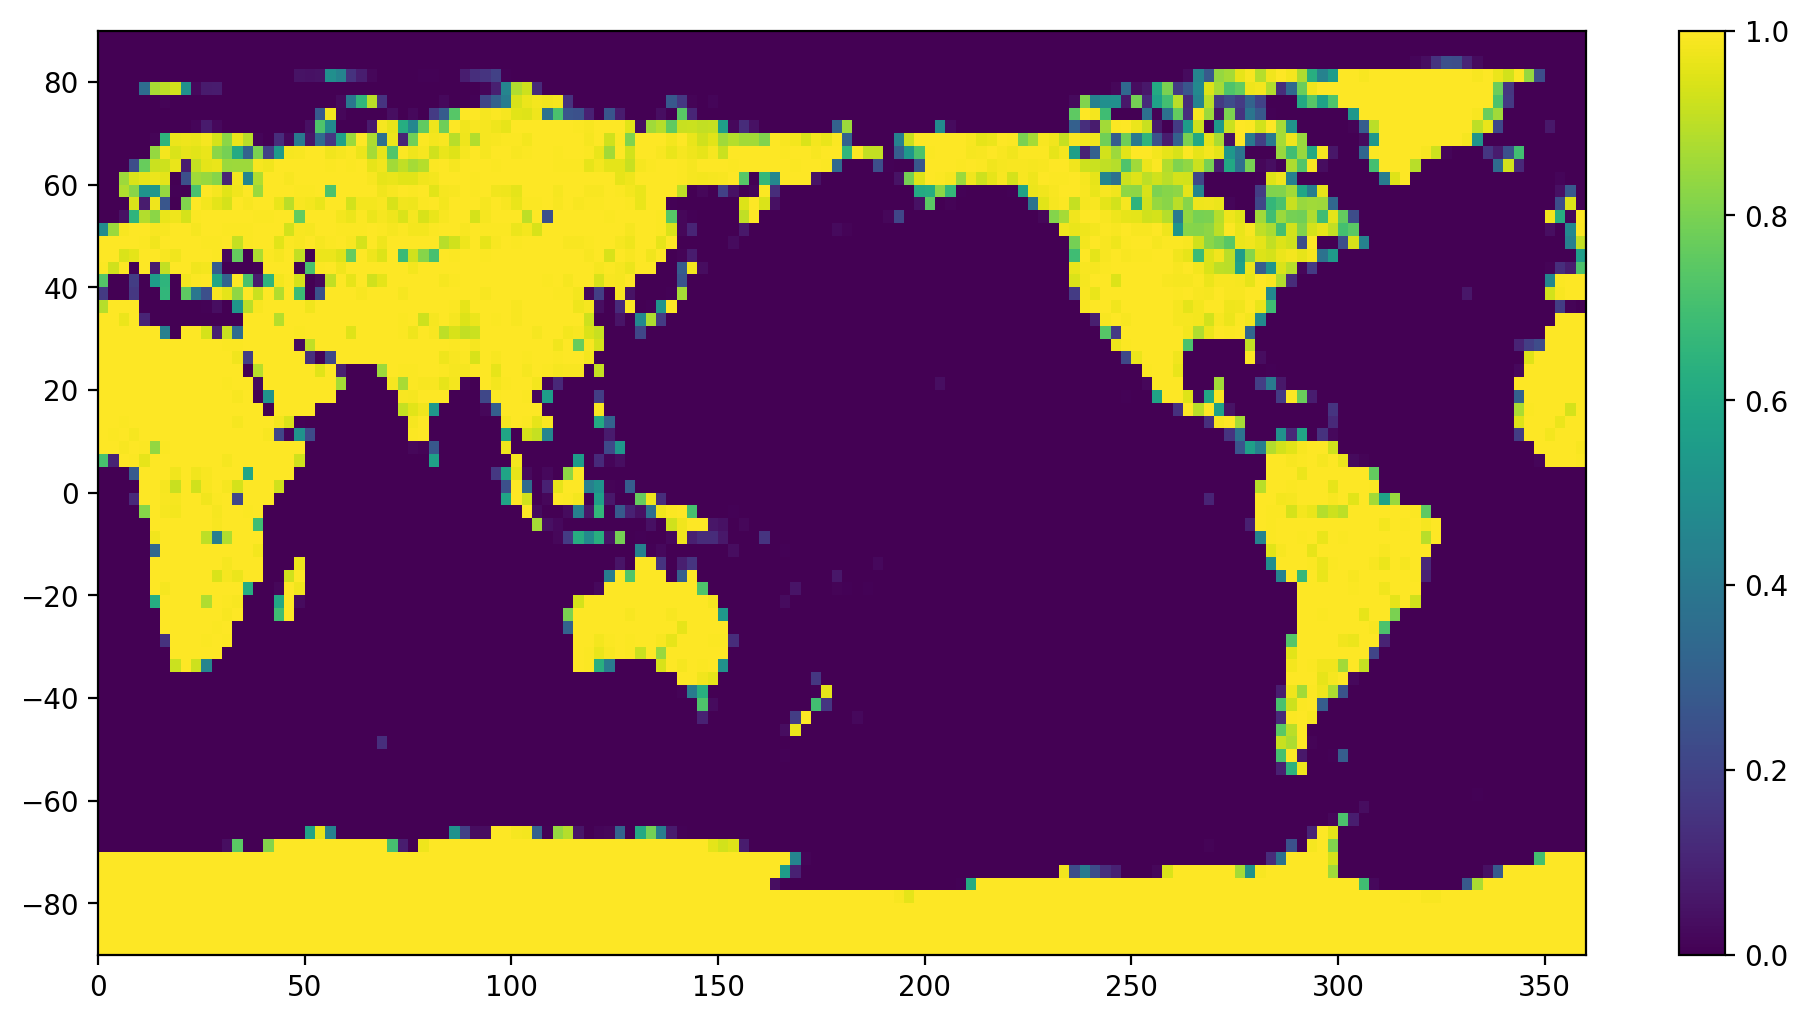

In [5]:
plot_roi(0,360,-90,90,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])

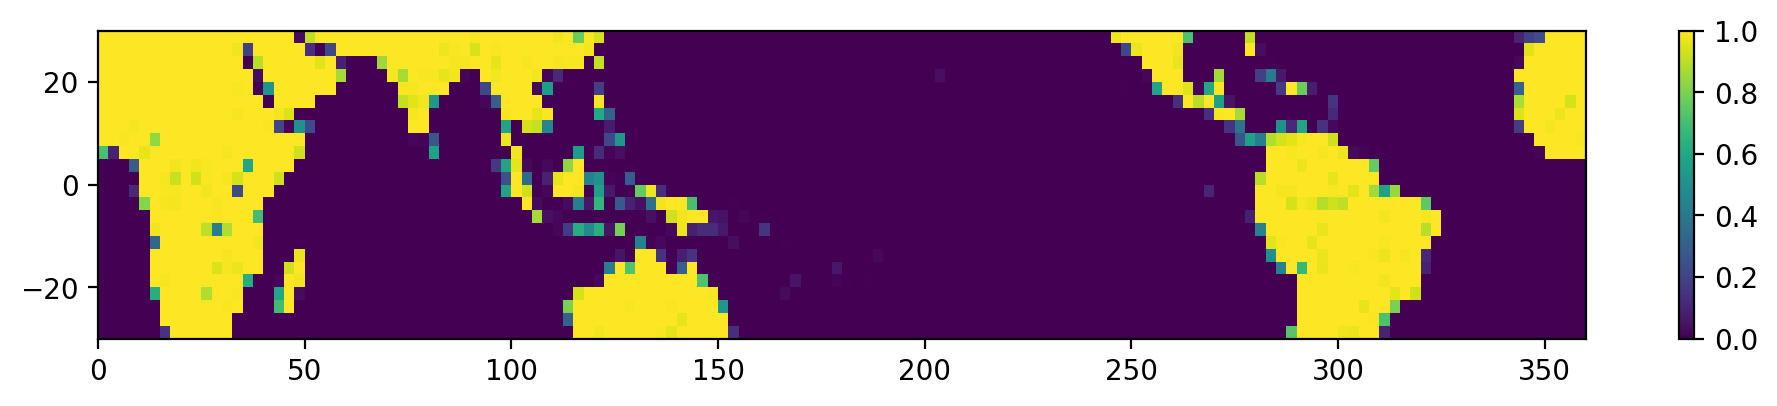

In [6]:
plot_roi(0,360,-30,30,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])

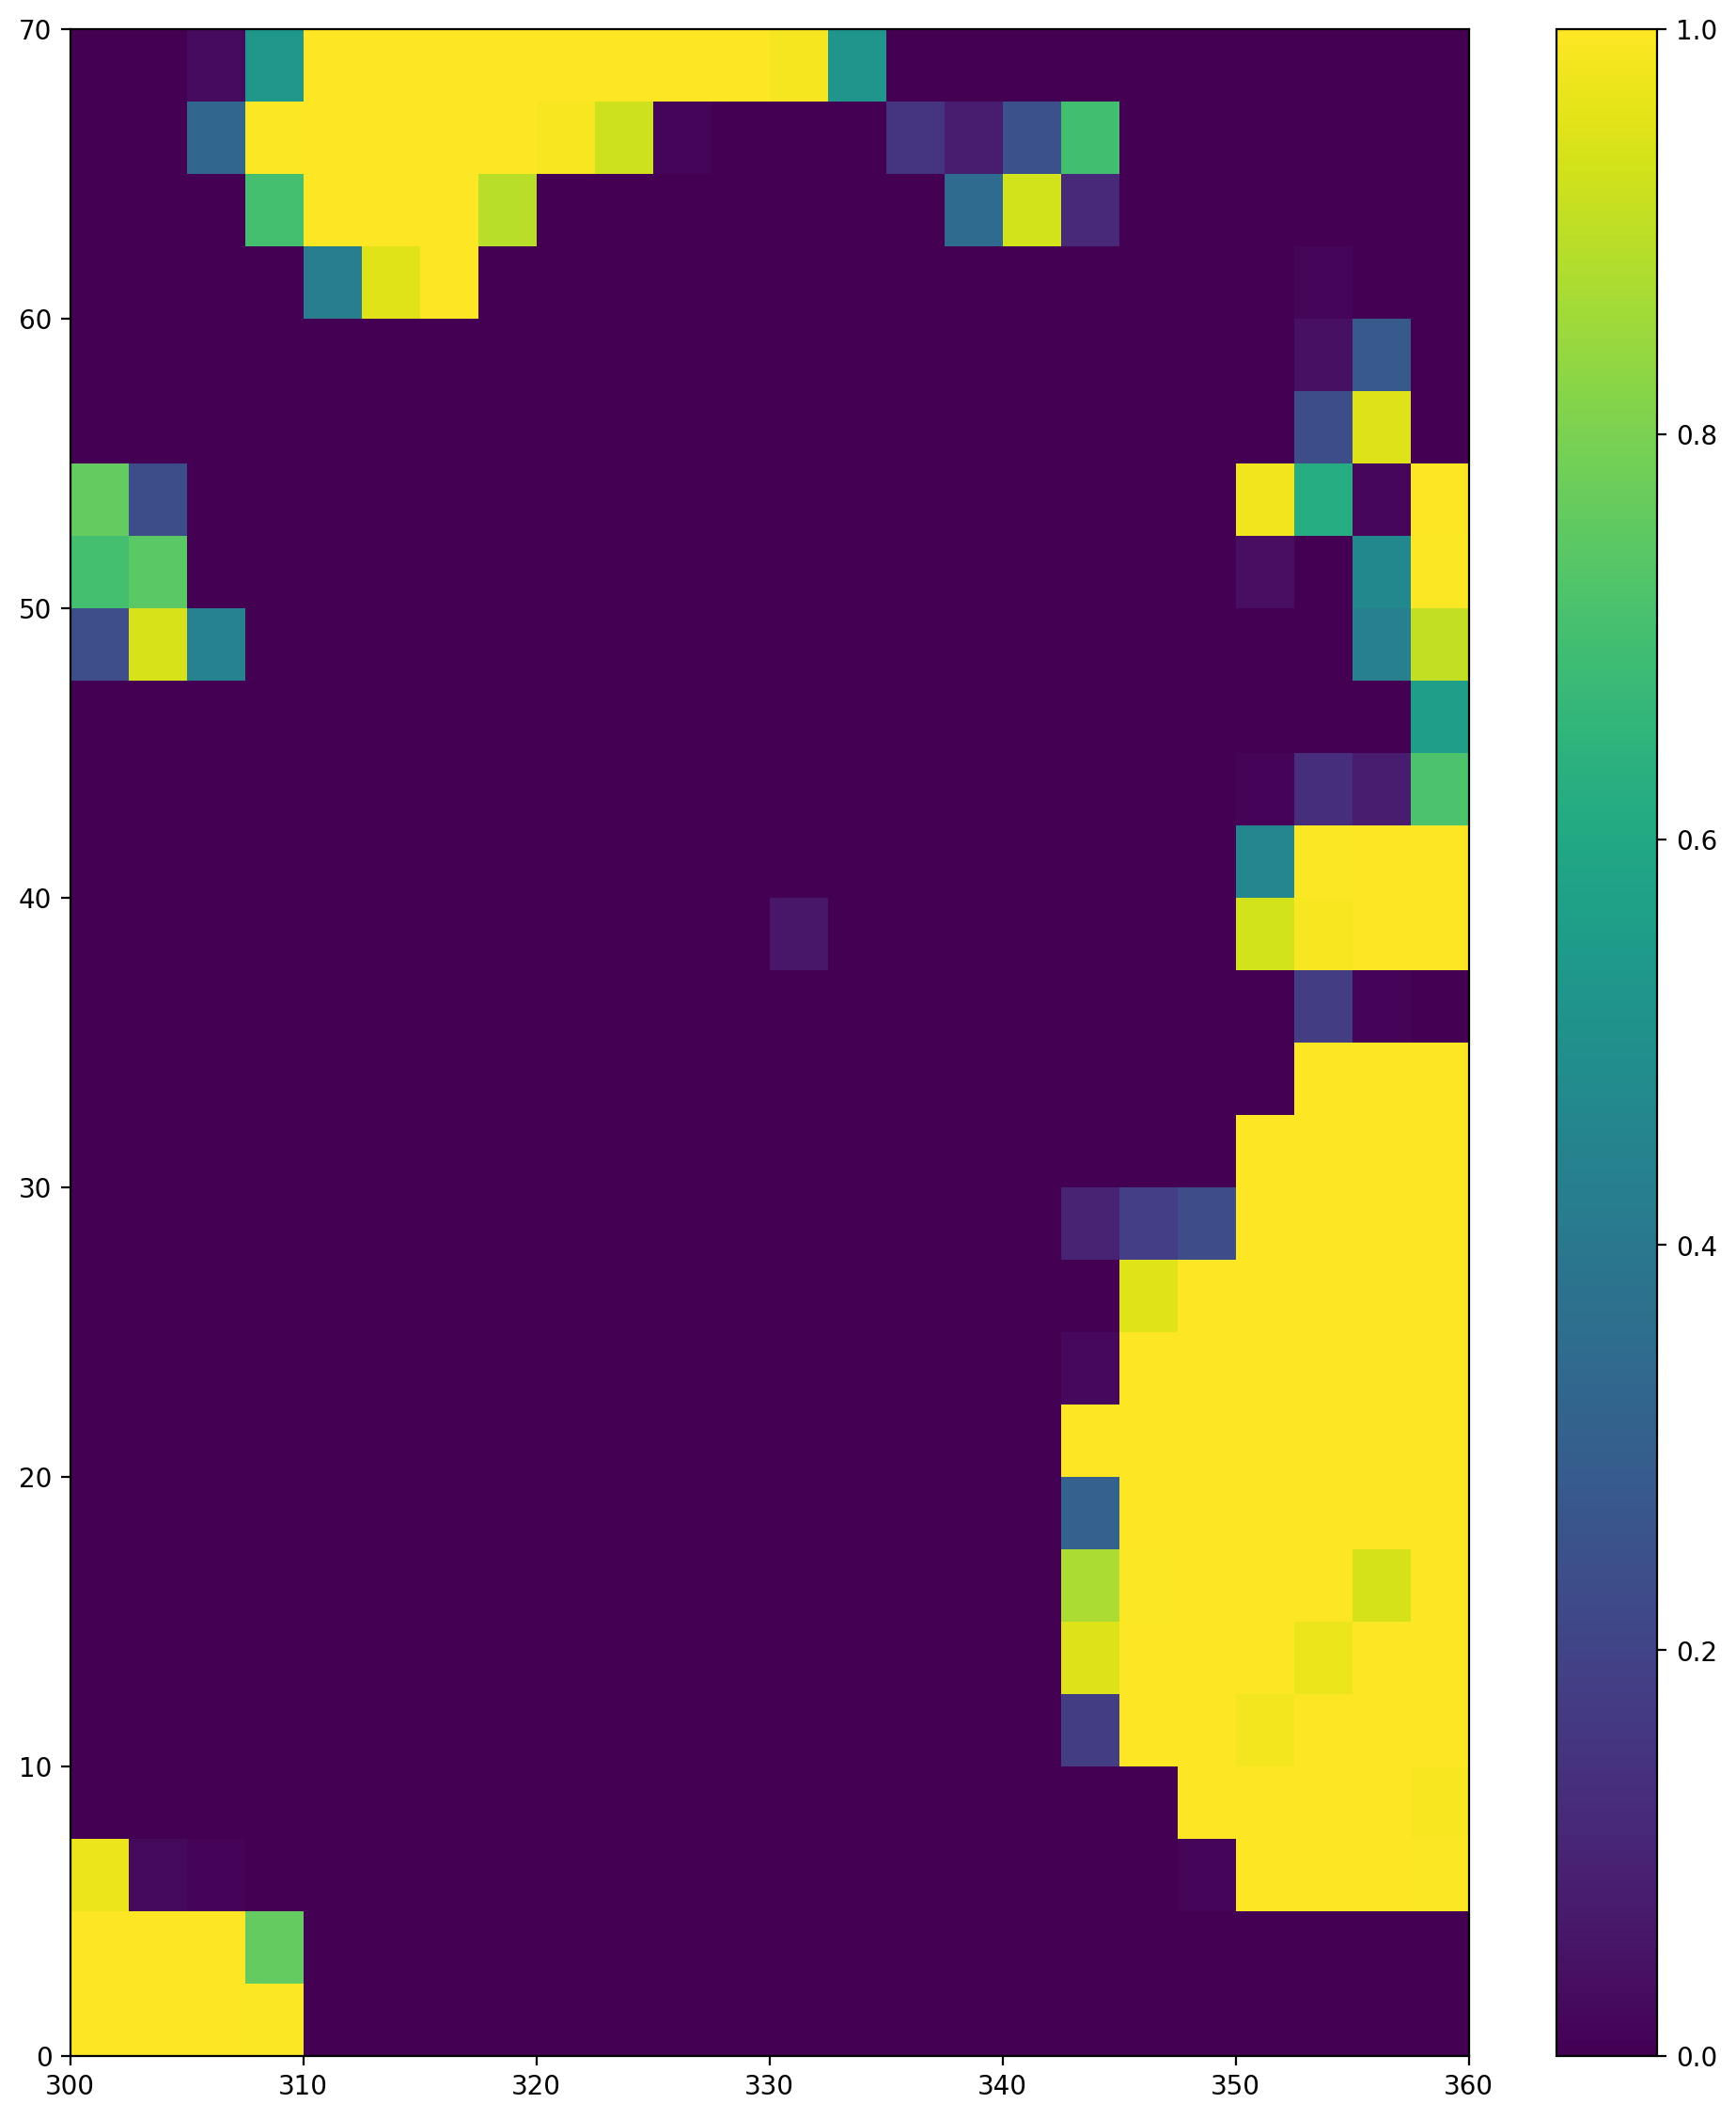

In [7]:
plot_roi(300,360,0,70,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])

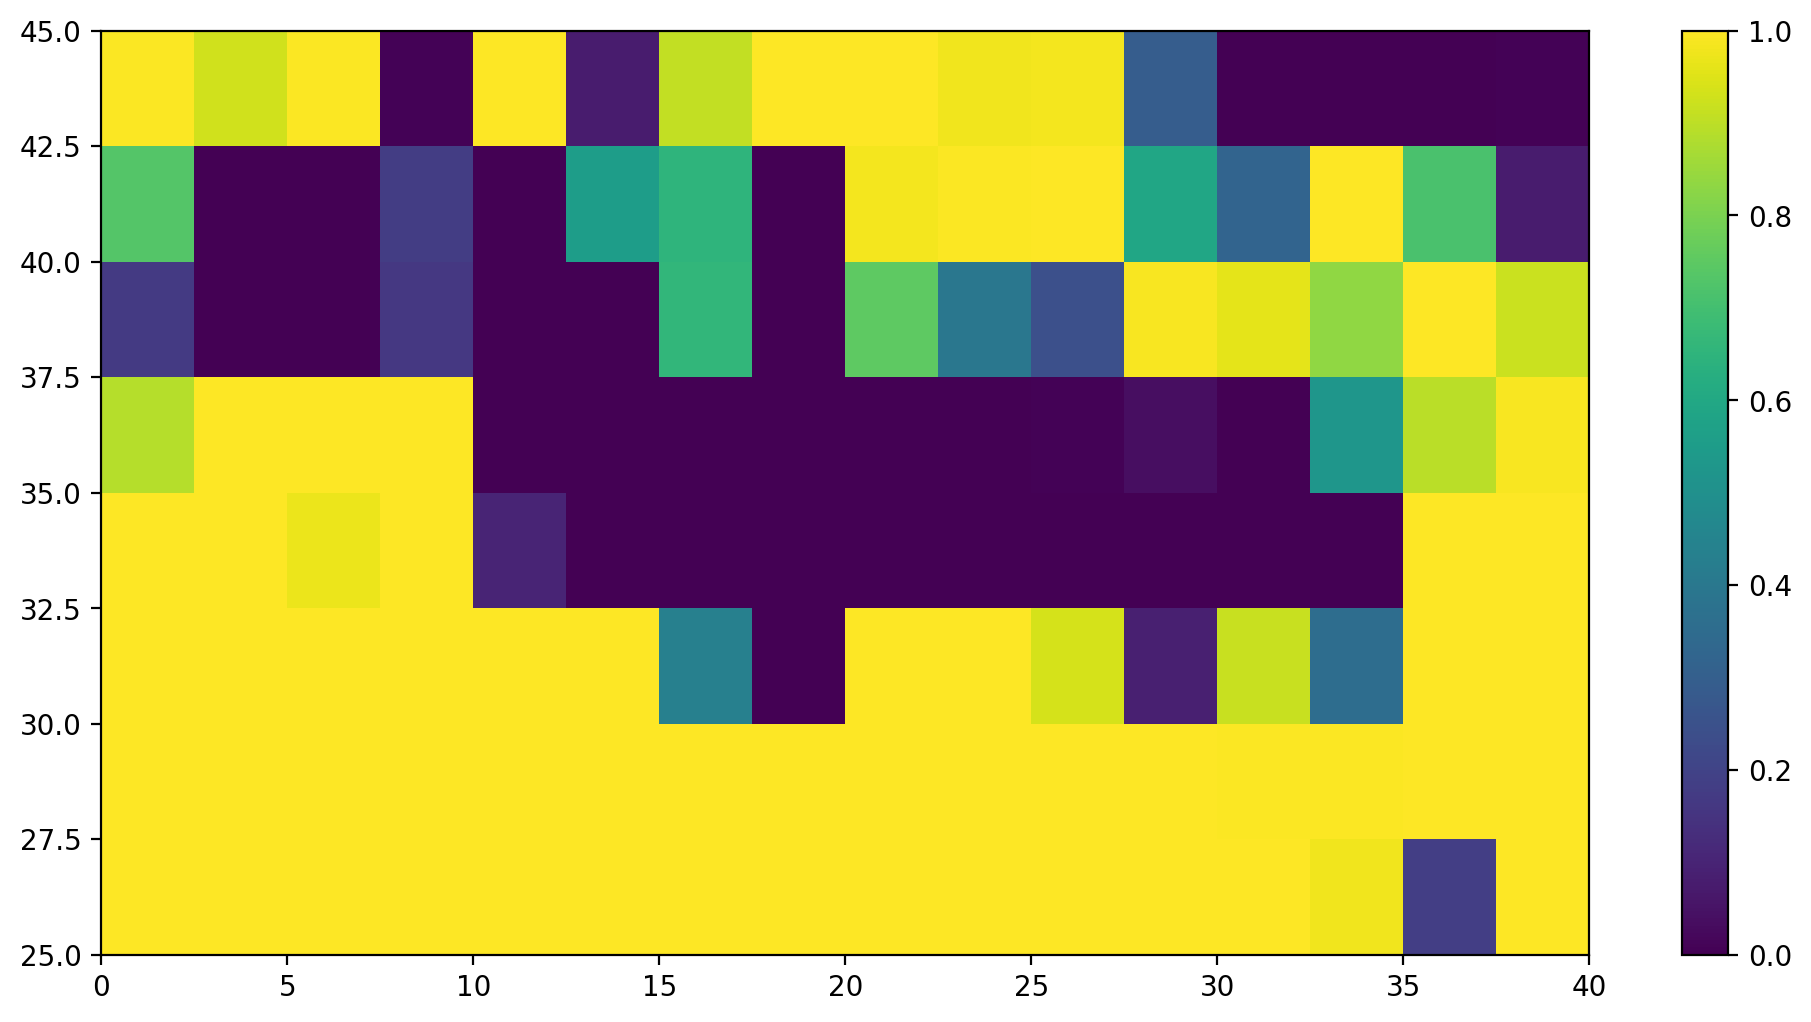

In [25]:
plot_roi(0,40,25,45,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])

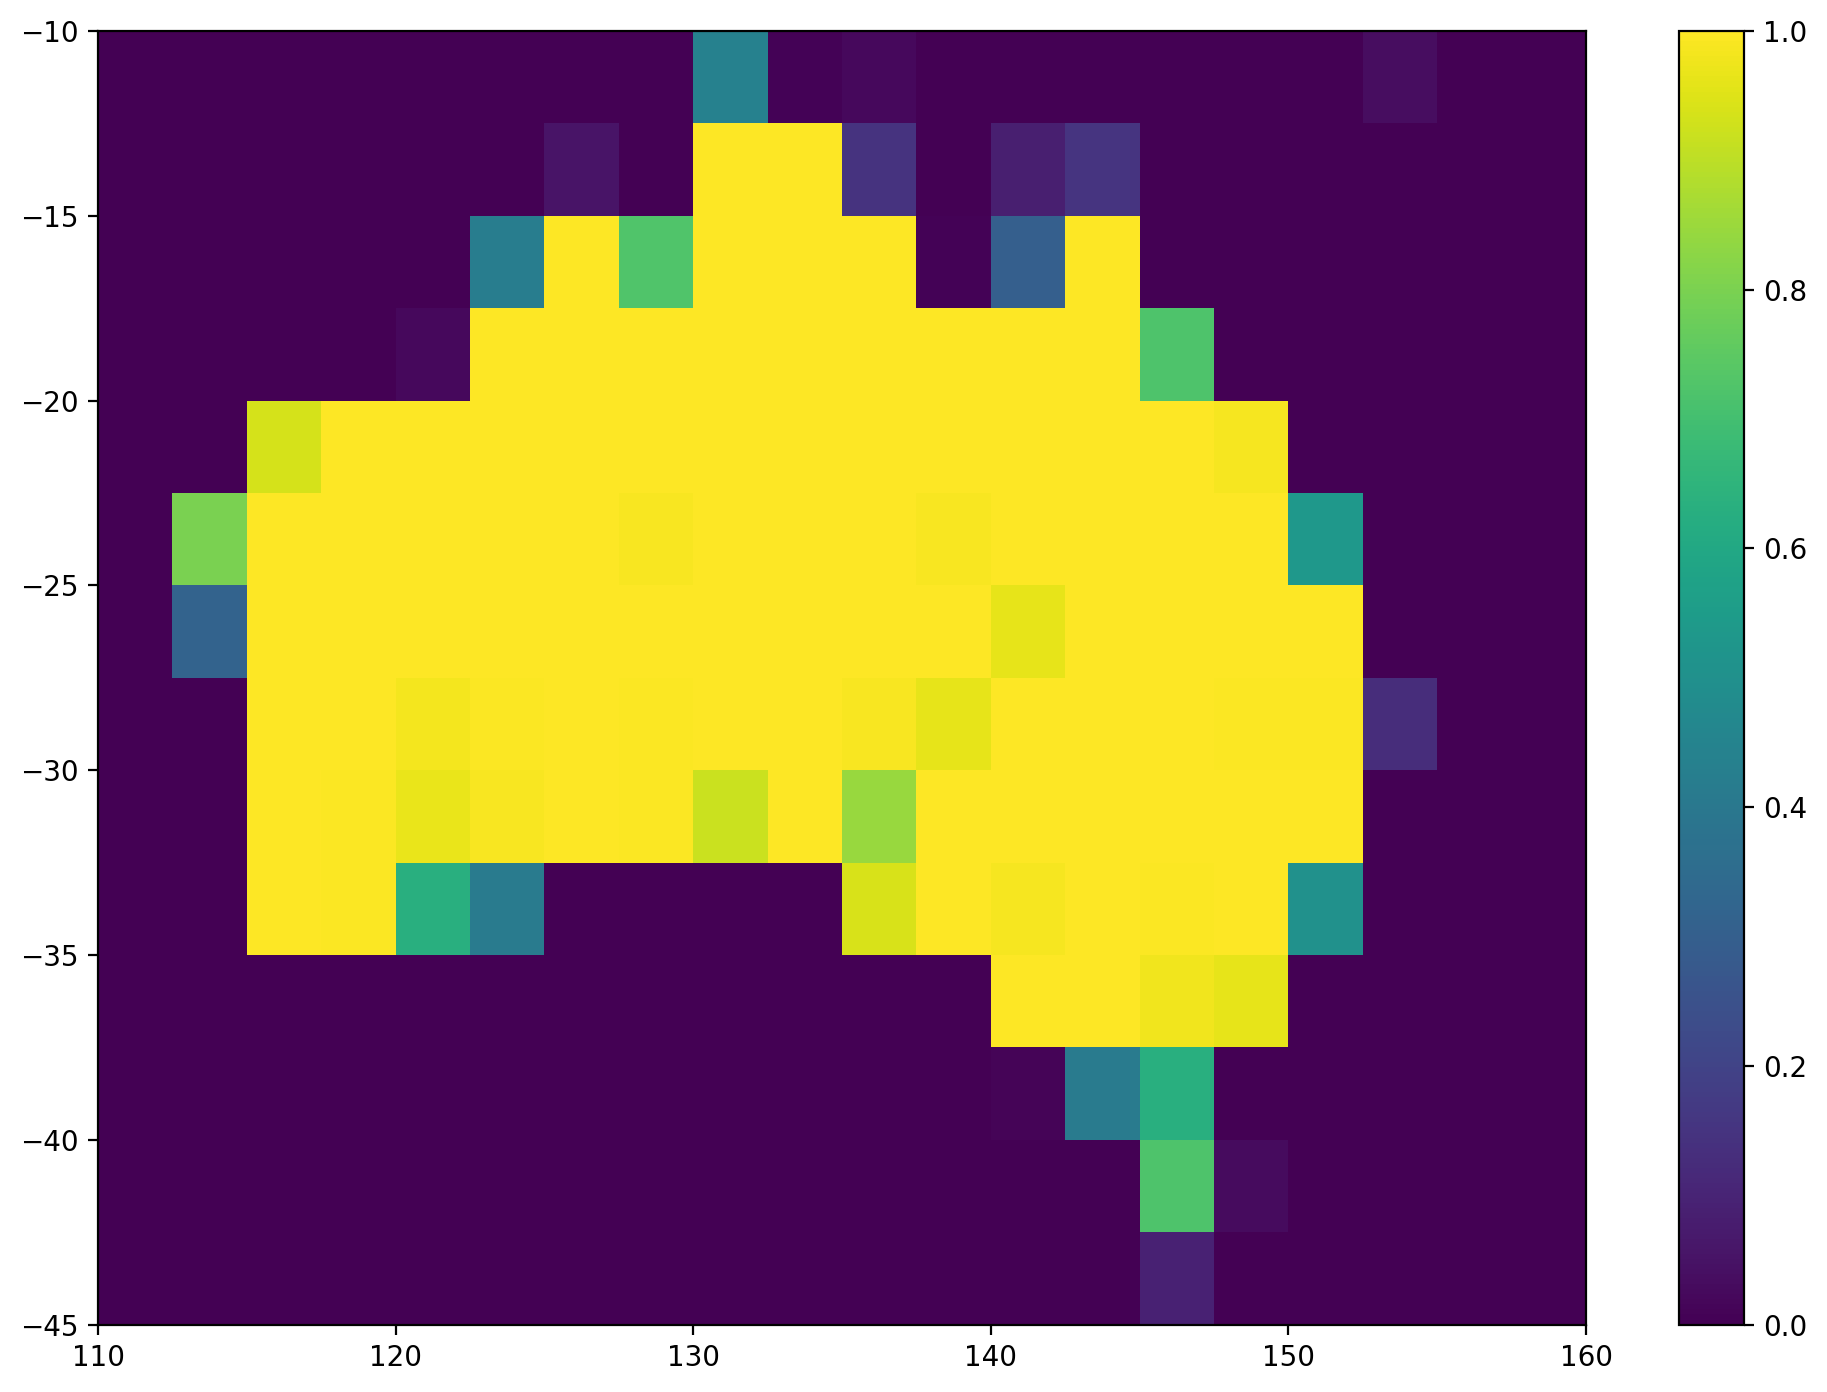

In [10]:
plot_roi(110,160,-45,-10,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])

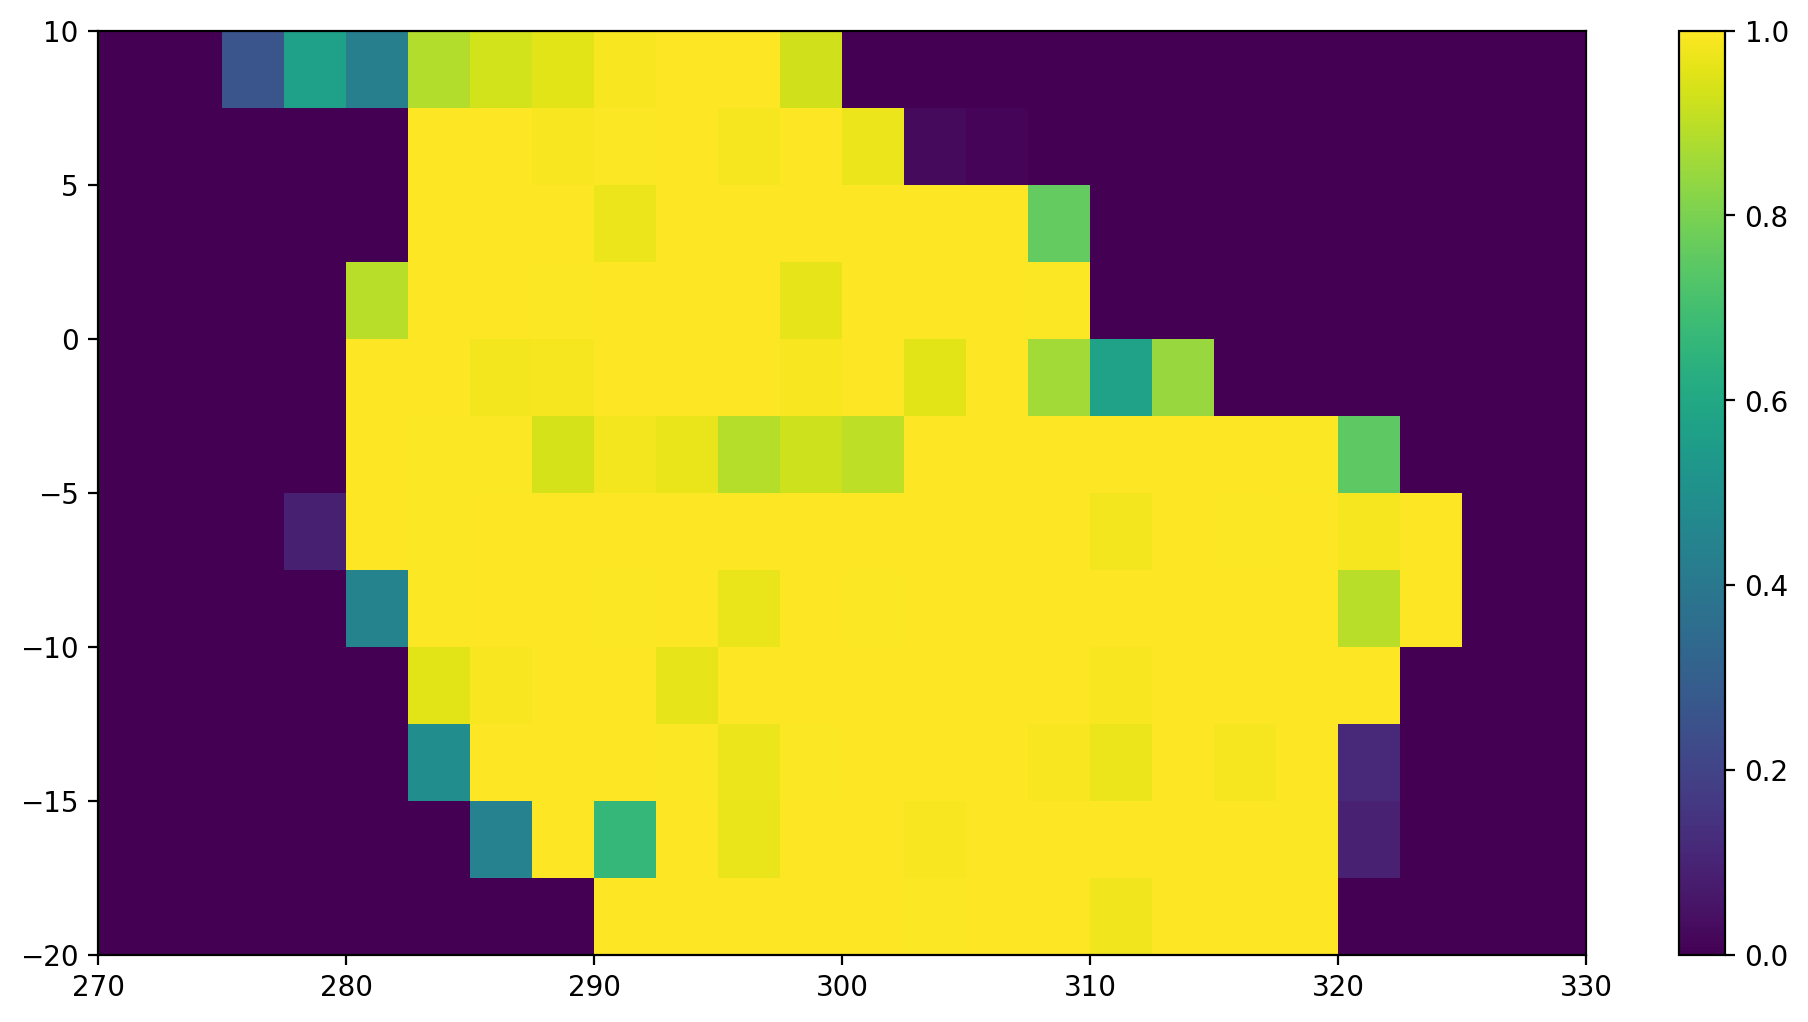

In [17]:
plot_roi(270,330,-20,10,era5_lsm_data['longitude'], era5_lsm_data['latitude'], era5_lsm_data['lsm'])